In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
%matplotlib inline
TOP = 15

In [56]:
df = pd.read_json('E:/dm-project-dataset/dataset/business.json', lines=True)

In [57]:
df.dtypes

address          object
attributes       object
business_id      object
categories       object
city             object
hours            object
is_open           int64
latitude        float64
longitude       float64
name             object
neighborhood     object
postal_code      object
review_count      int64
stars           float64
state            object
dtype: object

In [58]:
df.shape
print("Total Business: {}".format(df.shape[0]))

Total Business: 156639


In [59]:
grouped_by_city = df.groupby('city')
print("Number of Cities:", len(grouped_by_city))

grouped_by_city_sorted = sorted(grouped_by_city.groups, key=lambda k: len(grouped_by_city.groups[k]), reverse=True)
city_business_table = PrettyTable()
city_business_table.field_names = ["City", "Number of Businesses"]
print("Top {} cities in terms of number of businesses".format(TOP))
for city in grouped_by_city_sorted[:TOP]:
    city_business_table.add_row([city, len(grouped_by_city.groups[city])])
print(city_business_table)

Number of Cities: 1010
Top 15 cities in terms of number of businesses
+------------+----------------------+
|    City    | Number of Businesses |
+------------+----------------------+
| Las Vegas  |        24768         |
|  Phoenix   |        15656         |
|  Toronto   |        15483         |
| Charlotte  |         7557         |
| Scottsdale |         7510         |
| Pittsburgh |         5688         |
|  Montréal  |         5175         |
|    Mesa    |         5146         |
| Henderson  |         4130         |
|   Tempe    |         3949         |
|  Chandler  |         3649         |
| Edinburgh  |         3625         |
| Cleveland  |         2979         |
|  Madison   |         2891         |
|  Glendale  |         2841         |
+------------+----------------------+


In [60]:
df_category = df.loc[:, ['categories']]
business_per_cat = {}
for index, row in df_category.iterrows():
    for cat in row['categories']:
        if cat in business_per_cat:
            business_per_cat[cat] += 1
        else:
            business_per_cat[cat] = 1

business_per_cat_sorted = sorted(business_per_cat.items(), key=lambda x: x[1], reverse=True)
business_per_cat_table = PrettyTable()
business_per_cat_table.field_names = ["Category", "Number of Businesses"]
print("Top {} categories in terms of number of businesses".format(TOP))
for cat in business_per_cat_sorted[:TOP]:
    business_per_cat_table.add_row([cat[0], cat[1]])
print(business_per_cat_table)

Top 15 categories in terms of number of businesses
+---------------------------+----------------------+
|          Category         | Number of Businesses |
+---------------------------+----------------------+
|        Restaurants        |        51613         |
|          Shopping         |        24595         |
|            Food           |        23014         |
|       Beauty & Spas       |        15139         |
|       Home Services       |        13202         |
|      Health & Medical     |        12033         |
|         Nightlife         |        11364         |
|            Bars           |         9868         |
|         Automotive        |         9476         |
|       Local Services      |         9343         |
| Event Planning & Services |         8038         |
|        Active Life        |         7427         |
|          Fashion          |         6299         |
|         Sandwiches        |         5864         |
|         Fast Food         |         5792      

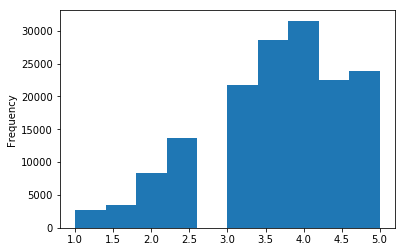

In [61]:
df.stars.plot(kind='hist')

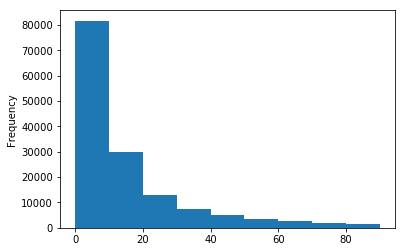

In [62]:
df.review_count.plot(kind='hist', bins=range(0,100,10))